# Convolutional Neural Network

## Machine learning on images

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## MNIST

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('./mnist.npz')

11173888/11490434 [============================>.] - ETA: 0s

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

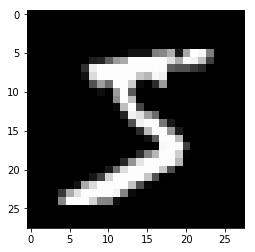

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [8]:
# Reshape the data
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [9]:
X_train.shape

(60000, 784)

In [10]:
# Convert the type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [11]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
# One-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
y_train_cat.shape

(60000, 10)

In [16]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [17]:
y_test_cat.shape

(10000, 10)

## Fully connected on images

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [22]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s - loss: 0.3079 - acc: 0.9056 - val_loss: 0.1547 - val_acc: 0.9531
Epoch 2/10
48000/48000 [==============================] - 3s - loss: 0.1068 - acc: 0.9678 - val_loss: 0.1364 - val_acc: 0.9593
Epoch 3/10
48000/48000 [==============================] - 3s - loss: 0.0707 - acc: 0.9785 - val_loss: 0.1696 - val_acc: 0.9491
Epoch 4/10
48000/48000 [==============================] - 3s - loss: 0.0514 - acc: 0.9846 - val_loss: 0.0968 - val_acc: 0.9737
Epoch 5/10
48000/48000 [==============================] - 3s - loss: 0.0390 - acc: 0.9881 - val_loss: 0.0962 - val_acc: 0.9753
Epoch 6/10
48000/48000 [==============================] - 3s - loss: 0.0300 - acc: 0.9909 - val_loss: 0.1203 - val_acc: 0.9742
Epoch 7/10
48000/48000 [==============================] - 3s - loss: 0.0257 - acc: 0.9920 - val_loss: 0.1691 - val_acc: 0.9618
Epoch 8/10
48000/48000 [==============================] - 3s 

In [27]:
h.history

{'acc': [0.9055833333333333,
  0.96781249999999996,
  0.97845833333333332,
  0.98456250000000001,
  0.98806249999999995,
  0.99091666666666667,
  0.99195833333333339,
  0.9937083333333333,
  0.99420833333333336,
  0.99481249999999999],
 'loss': [0.30794974660873414,
  0.10680834917724133,
  0.070712452597916128,
  0.051378674966593582,
  0.03902665867873778,
  0.030016542363290984,
  0.025699464256370749,
  0.021658036560693289,
  0.018432763420423725,
  0.018591273160874455],
 'val_acc': [0.95308333333333328,
  0.95933333317438763,
  0.94908333349227902,
  0.97366666650772093,
  0.97533333317438764,
  0.97424999984105431,
  0.96175000015894574,
  0.97049999984105428,
  0.97991666650772091,
  0.97499999984105423],
 'val_loss': [0.15472063878178596,
  0.13636008320252099,
  0.16964275618394217,
  0.096809101472298306,
  0.096222302999657894,
  0.12029841665209581,
  0.16907888345854977,
  0.15947267499628168,
  0.11797444580723095,
  0.14874218292892327]}

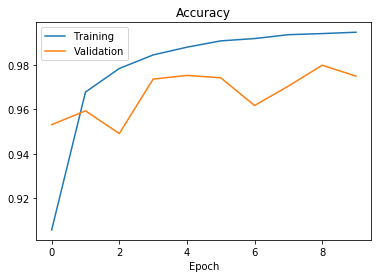

In [28]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [30]:
test_accuracy_full = model.evaluate(X_test, y_test_cat)

 9856/10000 [============================>.] - ETA: 0s

In [31]:
test_accuracy_full

[0.13709525289045846, 0.97709999999999997]

## Tensor Math

In [33]:
import numpy as np

In [36]:
# Random integer from 0 to 9
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2,3))

In [37]:
A

array([[[[0, 8, 5, 3, 6],
         [7, 0, 4, 8, 4],
         [5, 0, 5, 3, 3],
         [6, 4, 8, 2, 1]],

        [[6, 1, 2, 1, 3],
         [5, 0, 4, 2, 3],
         [4, 4, 1, 7, 1],
         [7, 5, 3, 8, 8]],

        [[6, 1, 9, 0, 8],
         [9, 7, 9, 0, 2],
         [0, 3, 3, 6, 6],
         [8, 6, 5, 4, 9]]],


       [[[9, 5, 1, 2, 1],
         [9, 8, 4, 6, 3],
         [3, 4, 8, 4, 2],
         [8, 6, 8, 1, 2]],

        [[0, 3, 0, 8, 7],
         [2, 0, 7, 6, 2],
         [0, 3, 0, 8, 1],
         [7, 9, 7, 0, 1]],

        [[1, 6, 3, 2, 7],
         [4, 9, 8, 0, 3],
         [6, 8, 3, 0, 1],
         [7, 8, 3, 1, 4]]]])

In [39]:
A[0, 1, 0, 3]

1

In [40]:
B

array([[5, 8, 4],
       [1, 9, 4]])

## A random colored image

In [41]:
img = np.random.randint(255, size=(4,4,3), dtype='uint8')

In [42]:
img

array([[[102,  78, 193],
        [201,  88, 178],
        [175, 166,  25],
        [152,  45, 105]],

       [[129,  22, 103],
        [ 41, 239,  32],
        [163,  85,  20],
        [ 80, 250,  89]],

       [[ 83,  31,  27],
        [ 30, 250,  84],
        [ 68,  37, 205],
        [  1, 247, 253]],

       [[118,  74,   1],
        [234,  84, 218],
        [208, 184,  99],
        [231,  17,  28]]], dtype=uint8)

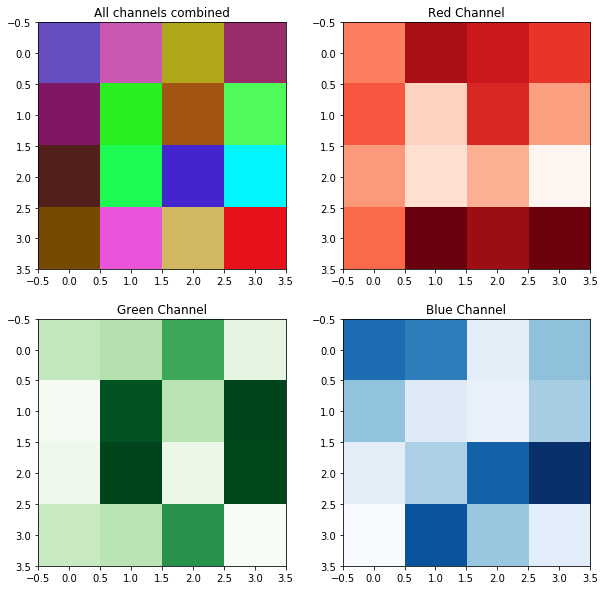

In [43]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img)
plt.title("All channels combined")

plt.subplot(222)
plt.imshow(img[:, :, 0], cmap='Reds')
plt.title("Red Channel")

plt.subplot(223)
plt.imshow(img[:, :, 1], cmap='Greens')
plt.title("Green Channel")

plt.subplot(224)
plt.imshow(img[:, :, 2], cmap='Blues')
plt.title("Blue Channel")

## Tensor operations

In [44]:
2 * A

array([[[[ 0, 16, 10,  6, 12],
         [14,  0,  8, 16,  8],
         [10,  0, 10,  6,  6],
         [12,  8, 16,  4,  2]],

        [[12,  2,  4,  2,  6],
         [10,  0,  8,  4,  6],
         [ 8,  8,  2, 14,  2],
         [14, 10,  6, 16, 16]],

        [[12,  2, 18,  0, 16],
         [18, 14, 18,  0,  4],
         [ 0,  6,  6, 12, 12],
         [16, 12, 10,  8, 18]]],


       [[[18, 10,  2,  4,  2],
         [18, 16,  8, 12,  6],
         [ 6,  8, 16,  8,  4],
         [16, 12, 16,  2,  4]],

        [[ 0,  6,  0, 16, 14],
         [ 4,  0, 14, 12,  4],
         [ 0,  6,  0, 16,  2],
         [14, 18, 14,  0,  2]],

        [[ 2, 12,  6,  4, 14],
         [ 8, 18, 16,  0,  6],
         [12, 16,  6,  0,  2],
         [14, 16,  6,  2,  8]]]])

In [45]:
A + A

array([[[[ 0, 16, 10,  6, 12],
         [14,  0,  8, 16,  8],
         [10,  0, 10,  6,  6],
         [12,  8, 16,  4,  2]],

        [[12,  2,  4,  2,  6],
         [10,  0,  8,  4,  6],
         [ 8,  8,  2, 14,  2],
         [14, 10,  6, 16, 16]],

        [[12,  2, 18,  0, 16],
         [18, 14, 18,  0,  4],
         [ 0,  6,  6, 12, 12],
         [16, 12, 10,  8, 18]]],


       [[[18, 10,  2,  4,  2],
         [18, 16,  8, 12,  6],
         [ 6,  8, 16,  8,  4],
         [16, 12, 16,  2,  4]],

        [[ 0,  6,  0, 16, 14],
         [ 4,  0, 14, 12,  4],
         [ 0,  6,  0, 16,  2],
         [14, 18, 14,  0,  2]],

        [[ 2, 12,  6,  4, 14],
         [ 8, 18, 16,  0,  6],
         [12, 16,  6,  0,  2],
         [14, 16,  6,  2,  8]]]])

In [48]:
A.shape

(2, 3, 4, 5)

In [49]:
B.shape

(2, 3)

In [47]:
np.tensordot(A, B, axes=([0, 1], [0, 1])

array([[ 85, 108,  90, 105, 178],
       [154,  72, 187, 116,  85],
       [ 84, 107,  65, 171,  62],
       [217, 203, 167,  95, 132]])

## Image filters with convolutions

In [50]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [51]:
img = misc.ascent()

In [52]:
img.shape

(512, 512)

In [53]:
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ..., 
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

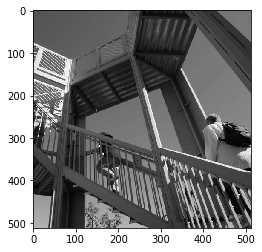

In [54]:
plt.imshow(img, cmap='gray')

In [55]:
h_kernel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

In [ ]:
plt.imshow(h_kernel, cmap='gray')

In [58]:
res = convolve2d(img, h_kernel)

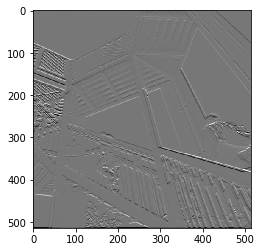

In [59]:
plt.imshow(res, cmap='gray')

## Convolutional neural networks

In [60]:
from keras.layers import Conv2D

In [61]:
img.shape

(512, 512)

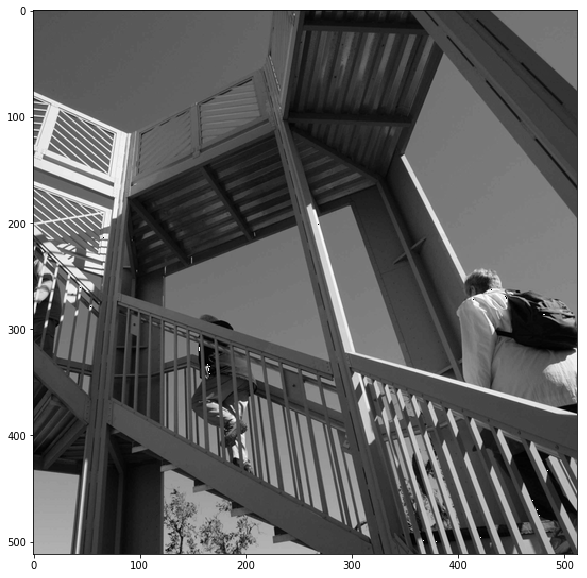

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [64]:
img_tensor = img.reshape((1, 512, 512, 1))

In [65]:
model = Sequential()
# # of Node: 1
# kernel_size = (3, 3)
model.add(Conv2D(1, (3, 3), strides=(2, 1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [66]:
img_pred_tensor = model.predict(img_tensor)

In [67]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [68]:
img_pred = img_pred_tensor[0, :, :, 0]

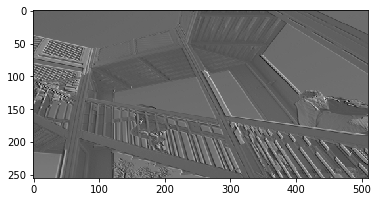

In [69]:
plt.imshow(img_pred, cmap='gray')

In [70]:
weights = model.get_weights()

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 510, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [71]:
weights[0].shape
# (3, 3) kernel, 1: input, 1: output

(3, 3, 1, 1)

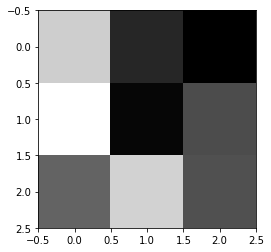

In [73]:
plt.imshow(weights[0][:,:,0, 0], cmap='gray')

In [74]:
# create a new filter
weights[0] = np.ones(weights[0].shape)

In [75]:
model.set_weights(weights)

In [76]:
img_pred_tensor = model.predict(img_tensor)

In [83]:
img_pred = img_pred_tensor[0, :, :, 0]

In [84]:
img_pred

array([[  740.,   744.,   747., ...,  1053.,  1053.,  1053.],
       [  739.,   744.,   747., ...,  1053.,  1053.,  1053.],
       [  745.,   746.,   747., ...,  1053.,  1053.,  1053.],
       ..., 
       [ 1584.,  1584.,  1584., ...,   528.,   632.,   934.],
       [ 1584.,  1584.,  1584., ...,   509.,   522.,   643.],
       [ 1599.,  1599.,  1599., ...,   455.,   510.,   524.]], dtype=float32)

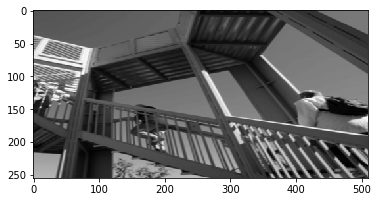

In [85]:
plt.imshow(img_pred, cmap='gray')

In [87]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')
img_pred_tensor  = model.predict(img_tensor)
img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers

In [89]:
from keras.layers import MaxPool2D, AvgPool2D

In [90]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [91]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

In [92]:
img_pred.shape

(102, 102)

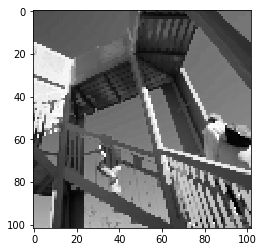

In [94]:
plt.imshow(img_pred, cmap='gray')

In [95]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [96]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

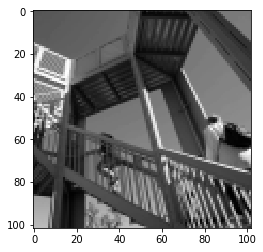

In [97]:
plt.imshow(img_pred, cmap='gray')

## Final architecture

In [98]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [99]:
X_train.shape

(60000, 28, 28, 1)

In [100]:
from keras.layers import Flatten, Activation

In [101]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
# output : 26x26
model.add(MaxPool2D(pool_size=(2, 2)))
# output: 13x13
model.add(Activation('relu'))

model.add(Flatten())
# 13x13x32 = 5408
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [103]:
13*13*32

5408

In [102]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [109]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 15s - loss: 0.0519 - acc: 0.9852 - val_loss: 0.0758 - val_acc: 0.9764
Epoch 2/2
42000/42000 [==============================] - 14s - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0555 - val_acc: 0.9833


In [107]:
model.evaluate(X_test, y_test_cat)

 9632/10000 [===========================>..] - ETA: 0s

[0.065905879534408449, 0.97799999999999998]

In [110]:
h.history

{'acc': [0.98521428571428571, 0.98852380952380947],
 'loss': [0.051904339617206939, 0.036874721698108175],
 'val_acc': [0.97638888894187081, 0.98327777777777781],
 'val_loss': [0.075764642841286131, 0.055535191696551113]}

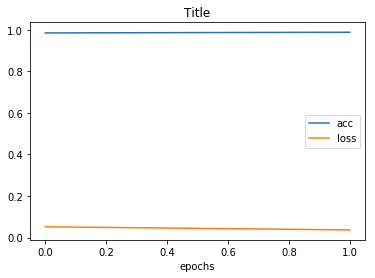

In [111]:
plt.plot(h.history['acc'])
plt.plot(h.history['loss'])
plt.legend(['acc', 'loss'])
plt.xlabel('epochs')
plt.title('Title')

## Exercise 1

In [108]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [112]:
from keras.utils.np_utils import to_categorical

In [113]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K

In [114]:
from keras.datasets import mnist

In [115]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('./mnist.npz')

In [116]:
X_train.shape

(60000, 28, 28)

In [117]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [119]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [120]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [125]:
# Model definition
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 26x26x32
model.add(MaxPool2D(pool_size=(2, 2)))
# 13x13x32

model.add(Conv2D(64, (3, 3), activation='relu'))
# 11x11x64
model.add(MaxPool2D(pool_size=(2, 2)))
# 5x5x64

model.add(Flatten())
# 5x5x64 = 1600
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [128]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=5, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 28s - loss: 0.2336 - acc: 0.9279 - val_loss: 0.0737 - val_acc: 0.9778
Epoch 2/5
42000/42000 [==============================] - 27s - loss: 0.0636 - acc: 0.9802 - val_loss: 0.0547 - val_acc: 0.9838
Epoch 3/5
42000/42000 [==============================] - 28s - loss: 0.0419 - acc: 0.9864 - val_loss: 0.0456 - val_acc: 0.9868
Epoch 4/5
42000/42000 [==============================] - 27s - loss: 0.0311 - acc: 0.9897 - val_loss: 0.0486 - val_acc: 0.9861
Epoch 5/5
42000/42000 [==============================] - 29s - loss: 0.0228 - acc: 0.9924 - val_loss: 0.0449 - val_acc: 0.9878


In [129]:
h.history

{'acc': [0.9279047619047619,
  0.98019047619047617,
  0.98638095238095236,
  0.98969047619047623,
  0.99242857142857144],
 'loss': [0.2335985036109175,
  0.063605810280889269,
  0.041852369530569943,
  0.031075450093263672,
  0.022831796458611886],
 'val_acc': [0.97777777777777775,
  0.9837777778307597,
  0.98683333333333334,
  0.98611111111111116,
  0.98777777777777775],
 'val_loss': [0.073661207622951932,
  0.054657738629314633,
  0.045582510440713826,
  0.048638547776111714,
  0.044909879517224097]}

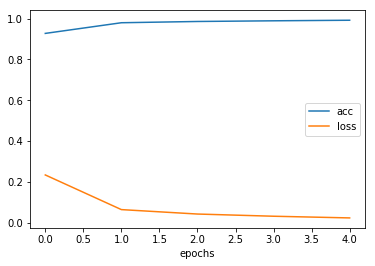

In [130]:
plt.plot(h.history['acc'])
plt.plot(h.history['loss'])
plt.legend(['acc', 'loss'])
plt.xlabel('epochs')

In [131]:
model.evaluate(X_test, y_test_cat)

 9920/10000 [============================>.] - ETA: 0s

[0.035174056583311179, 0.98870000000000002]

## Exercise 2

In [132]:
from keras.datasets import cifar10

In [133]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170180608/170498071 [============================>.] - ETA: 0s

In [134]:
X_train.shape

(50000, 32, 32, 3)

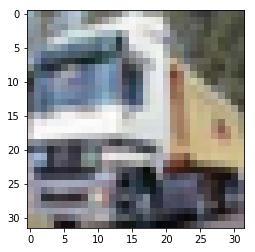

In [137]:
plt.imshow(X_train[1])

In [138]:
# Rescale image
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [139]:
y_train.shape

(50000, 1)

In [147]:
set(y_train[:,0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [148]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [149]:
y_train_cat.shape

(50000, 10)

In [151]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# 32x32x32
model.add(Conv2D(32, (3, 3), activation='relu'))
# 30x30x32
model.add(MaxPool2D(pool_size=(2,2)))
# 15X15X32

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# 15x15x64
model.add(Conv2D(64, (3, 3), activation='relu'))
# 13x13x64
model.add(MaxPool2D(pool_size=(2,2)))
# 6x6x64

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [152]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [153]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

In [156]:
h = model.fit(X_train, y_train_cat, batch_size=32, epochs=5, validation_data=(X_test, y_test_cat), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 224s - loss: 1.3736 - acc: 0.5089 - val_loss: 1.0719 - val_acc: 0.6187
Epoch 2/5
50000/50000 [==============================] - 225s - loss: 0.8852 - acc: 0.6937 - val_loss: 0.9539 - val_acc: 0.6746
Epoch 3/5
50000/50000 [==============================] - 228s - loss: 0.7128 - acc: 0.7561 - val_loss: 0.8999 - val_acc: 0.6986
Epoch 4/5
50000/50000 [==============================] - 217s - loss: 0.6355 - acc: 0.7866 - val_loss: 0.9177 - val_acc: 0.7101
Epoch 5/5
50000/50000 [==============================] - 227s - loss: 0.6119 - acc: 0.7973 - val_loss: 0.9004 - val_acc: 0.7499


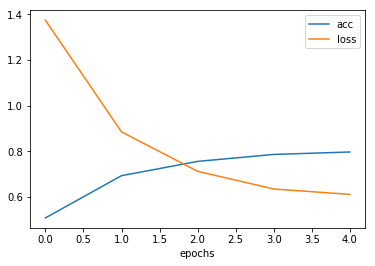

In [157]:
plt.plot(h.history['acc'])
plt.plot(h.history['loss'])
plt.legend(['acc', 'loss'])
plt.xlabel('epochs')